<a href="https://colab.research.google.com/github/YonggunJung/AI2_Ploy/blob/main/14_%EB%AA%A8%EB%8D%B8%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0(%EC%99%80%EC%9D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 검증셋 - validation_split = 0.nn
### model.fit(validation_split = 0.25)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 7.56 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
df = pd.read_csv('./data/wine.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=True)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim = 12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1089 (4.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 0.8 * 0.25 = 0.2
history = model.fit(xtrain, ytrain, epochs = 50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 2s 42ms/step - loss: 11.0310 - accuracy: 0.2497 - val_loss: 9.0424 - val_accuracy: 0.2385
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 7.3238 - accuracy: 0.2497 - val_loss: 5.4188 - val_accuracy: 0.2385
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 4.1804 - accuracy: 0.2497 - val_loss: 2.6684 - val_accuracy: 0.2400
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 1.6892 - accuracy: 0.2510 - val_loss: 0.8852 - val_accuracy: 0.2392
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.7820 - accuracy: 0.2964 - val_loss: 0.6760 - val_accuracy: 0.4946
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6022 - accuracy: 0.7442 - val_loss: 0.5122 - val_accuracy: 0.9038
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4700 - accuracy: 0.8956 - val_loss: 0.4096 - val_accuracy: 0.9192
Epoch 8/50
8/8 [===============

In [11]:
score = model.evaluate(xtest, ytest)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9369
Test accuracy :  0.936923086643219


In [12]:
# 마지막 에포크의 검증셋 정확도를 이름으로 모델 저장
modelpath= "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

## 체크포인트 - ModelCheckpoint
### ModelCheckpoint(filepath=modelpath, verbose=1)

In [13]:
# 모델 체크포인트
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [15]:
# checkpoint를 사용해 모델 실행
history = model.fit(xtrain, ytrain, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.9423.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9415.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9423.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9423.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9431.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9431.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9423.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9438.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9423.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9438.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9438.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9446.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9446.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9454.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9454.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9462.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9469.hdf5

Epoch

In [16]:
score = model.evaluate(xtest, ytest)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9554
Test accuracy :  0.9553846120834351


## 그래프로 과적합 확인

In [18]:
# 2천번 학습
history = model.fit(xtrain, ytrain, epochs=2000, batch_size=500, validation_split = 0.25)

Epoch 1/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1269 - accuracy: 0.9502 - val_loss: 0.1233 - val_accuracy: 0.9554
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1256 - accuracy: 0.9497 - val_loss: 0.1222 - val_accuracy: 0.9592
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1240 - accuracy: 0.9505 - val_loss: 0.1204 - val_accuracy: 0.9592
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1236 - accuracy: 0.9500 - val_loss: 0.1225 - val_accuracy: 0.9615
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1210 - accuracy: 0.9505 - val_loss: 0.1186 - val_accuracy: 0.9600
Epoch 6/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1225 - accuracy: 0.9489 - val_loss: 0.1173 - val_accuracy: 0.9600
Epoch 7/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1194 - accuracy: 0.9528 - val_loss: 0.1172 - val_accuracy: 0.9623
Epoch 8/2000
8/8 [

In [19]:
# 필요한 loss, accyracy, val_loss, val_accuracy는 history.history에 있음. 이걸 확인
hdf = pd.DataFrame(history.history)
hdf

,loss,accuracy,val_loss,val_accuracy
0,0.126887,0.950218,0.123308,0.955385
1,0.125586,0.949705,0.122242,0.959231
2,0.123963,0.950475,0.120367,0.959231
3,0.123566,0.949961,0.122470,0.961538
4,0.121020,0.950475,0.118556,0.960000
...,...,...,...,...
1995,0.017561,0.993841,0.067290,0.986154
1996,0.015649,0.995638,0.067010,0.990000
1997,0.015490,0.995638,0.066697,0.986154
1998,0.014840,0.996151,0.064385,0.987692


In [20]:
# val_loss와 loss 따로 저장
yvloss = hdf['val_loss']
yloss = hdf['loss']

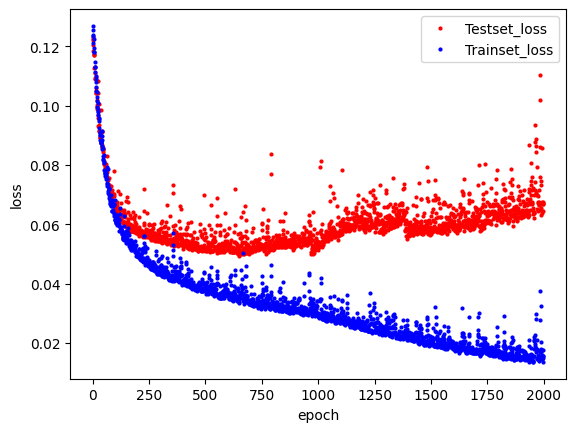

In [21]:
# 그래프로 확인
# 학습셋에서 얻은 오차는 빨간색, 검증셋에서 얻은 오차는 파란색
xlen = np.arange(len(yloss))
plt.plot(xlen, yvloss, "o", c='red', markersize=2, label='Testset_loss')
plt.plot(xlen, yloss, 'o', c='blue', markersize=2, label="Trainset_loss")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 자동중단 - EarlyStopping()
### EarlyStopping(monitor='val_loss', patience=20)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# monitor 옵션은 model.fit() 결과중 어떤 것을 이용할지 정함
# patience 옵션은 지정된 값이 몇번 이상 향상되지 않으면 학습을 종료 시킬지 정함.즉 몇번 더 지켜볼지 정함
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [23]:
# 최고의 모델 하나만 저장
modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only=True)

In [24]:
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only=True)
history = model.fit(xtrain, ytrain, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 67ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0641 - val_accuracy: 0.9885
Epoch 2/2000
8/8 [==============================] - 0s 33ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0671 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 30ms/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0.0777 - val_accuracy: 0.9846
Epoch 4/2000
8/8 [==============================] - 0s 31ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0701 - val_accuracy: 0.9862
Epoch 5/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.0690 - val_accuracy: 0.9885
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0667 - val_accuracy: 0.9869
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.9967 - val_loss: 0.0656 - val_accuracy: 0.9885
Epoch 8/2000
8/

In [25]:
score = model.evaluate(xtest, ytest)
print("Test accuracy : ", score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9831
Test accuracy :  0.9830769300460815
